In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.lines import Line2D 
from matplotlib import lines
import matplotlib.patches as patches
from scipy.stats import rankdata
from flexitext import flexitext
from matplotlib.patheffects import withStroke
from datetime import datetime, timedelta
from scipy.special import expit
from functools import reduce

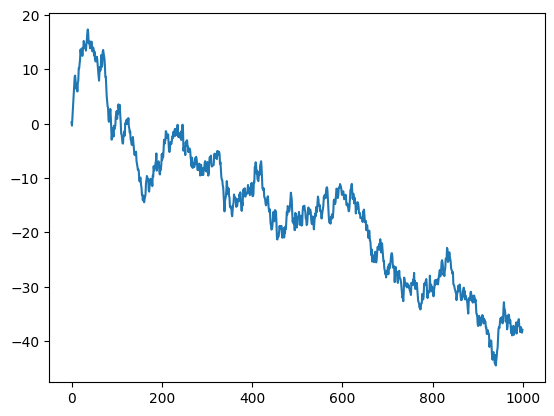

In [2]:
values = np.cumsum(np.random.randn(1000,1))
plt.plot(values)

In [2]:
from scipy.stats import norm

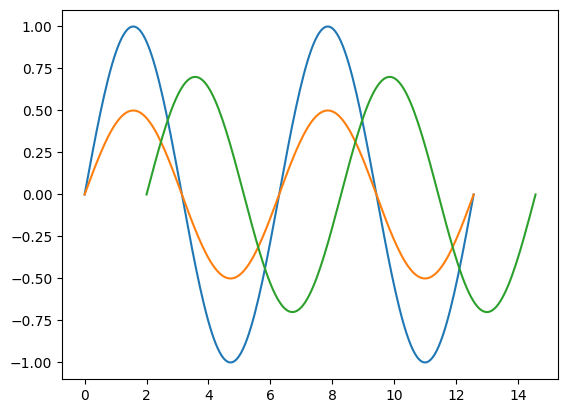

In [16]:
X = np.linspace(0,4*np.pi, 200)
Y = np.sin(X)
plt.plot(X,Y)
plt.plot(X,Y*.5)
plt.plot(X+2,Y*.7)

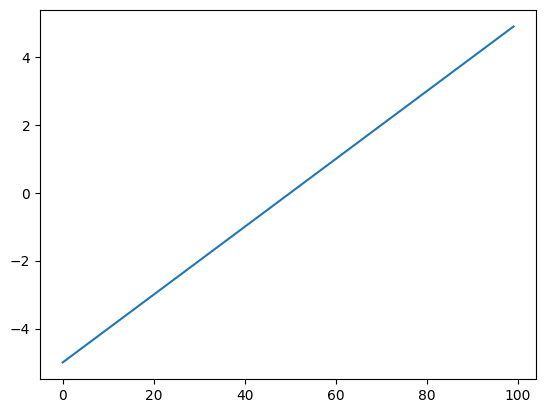

In [7]:
plt.plot(np.arange(-5,5,0.1))

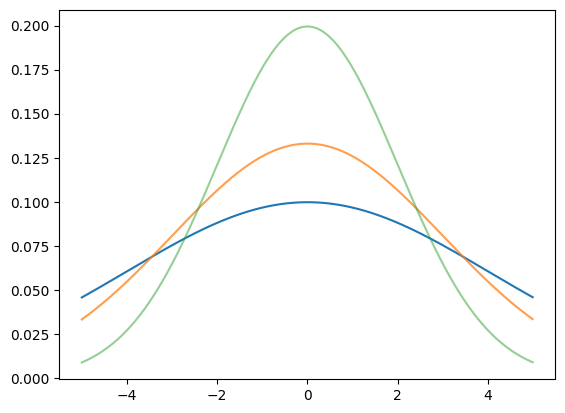

In [4]:
x=np.arange(-5,5,0.1)
legend=[]
for i in range(4,1,-1):
    plt.plot(x,norm.pdf(x,0,i), alpha=0.25*i)

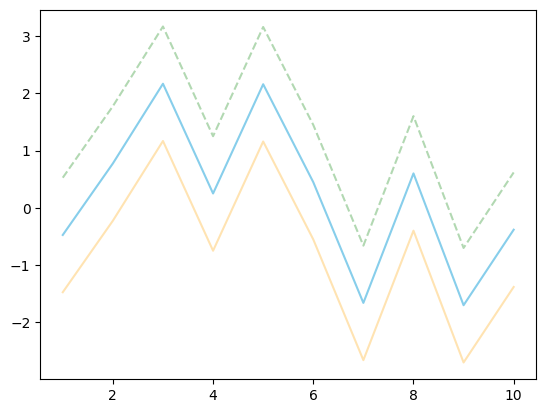

In [13]:
df = pd.DataFrame({'x_values':range(1,100),
                   'y_values':np.random.randn(100)})
df['second'] = df['y_values'].apply(lambda x : x-1)
df['third'] = df['y_values'].apply(lambda x : x+1)
plt.plot('x_values',
         'y_values',
         data=df, 
         color='skyblue')

plt.plot('x_values',
         'second',
         data=df,
         color='orange',
         alpha=.3)

plt.plot('x_values',
         'third',
         data=df,
         color='green',
         alpha=.3,
         linestyle='--')

plt.legend()
plt.show()

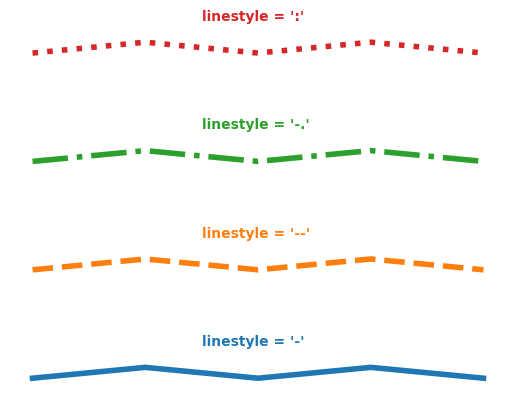

In [14]:
plt.plot( [1,1.1,1,1.1,1], linestyle='-' , linewidth=4)
plt.text(1.5, 1.3, "linestyle = '-' ", horizontalalignment='left', size='medium', color='C0', weight='semibold')
plt.plot( [2,2.1,2,2.1,2], linestyle='--' , linewidth=4 )
plt.text(1.5, 2.3, "linestyle = '--' ", horizontalalignment='left', size='medium', color='C1', weight='semibold')
plt.plot( [3,3.1,3,3.1,3], linestyle='-.' , linewidth=4 )
plt.text(1.5, 3.3, "linestyle = '-.' ", horizontalalignment='left', size='medium', color='C2', weight='semibold')
plt.plot( [4,4.1,4,4.1,4], linestyle=':' , linewidth=4 )
plt.text(1.5, 4.3, "linestyle = ':' ", horizontalalignment='left', size='medium', color='C3', weight='semibold')
plt.axis('off')
plt.show()

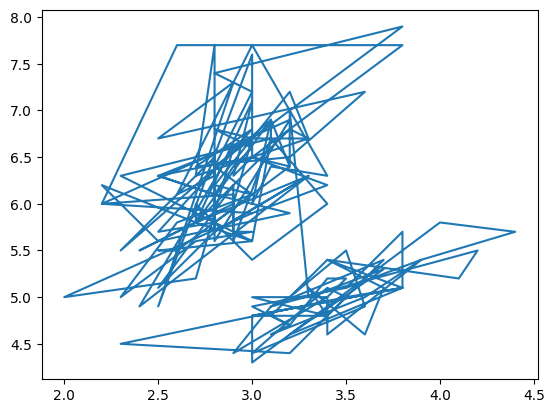

In [15]:
df = sns.load_dataset('iris')
plt.plot( 'sepal_width', 'sepal_length', data=df)
plt.show()

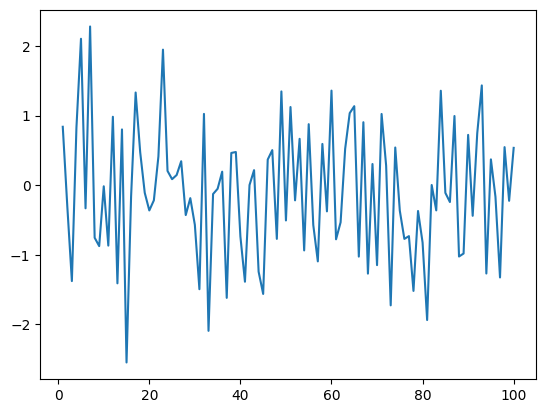

In [16]:
df=pd.DataFrame({'xvalues': range(1,101), 
                 'yvalues': np.random.randn(100) })

plt.plot('xvalues',
         'yvalues',
         data=df)
plt.show()

In [25]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", 
    delim_whitespace=True
)

data["date"] = pd.to_datetime(data["date"])

date = data["date"]
value = data["value"]

In [37]:
month_year_formatter = mdates.DateFormatter('%b, %Y')
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
monthly_locator = mdates.MonthLocator()

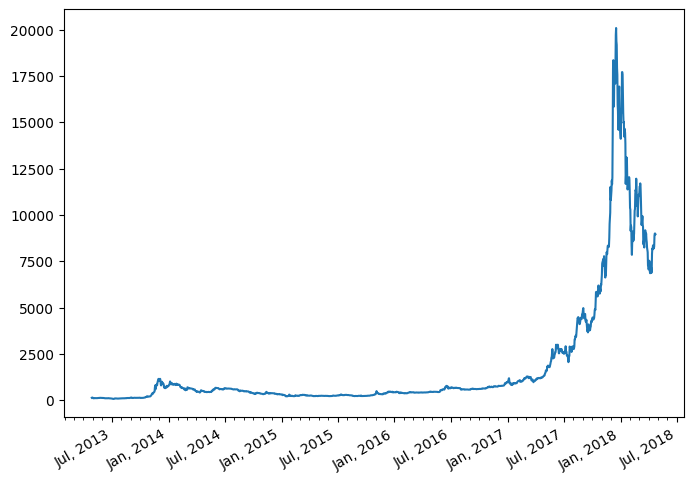

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)

ax.plot(date, value)

fig.autofmt_xdate()

In [40]:
rng = np.random.default_rng(1234)

In [41]:
date = [datetime(2019, 1, 1) + timedelta(i) for i in range(100)]
temperature = np.arange(100) ** 2.5 / 10000 + rng.uniform(size=100)
price = np.arange(120, 20, -1) ** 1.5 / 10 + rng.uniform(size=100)

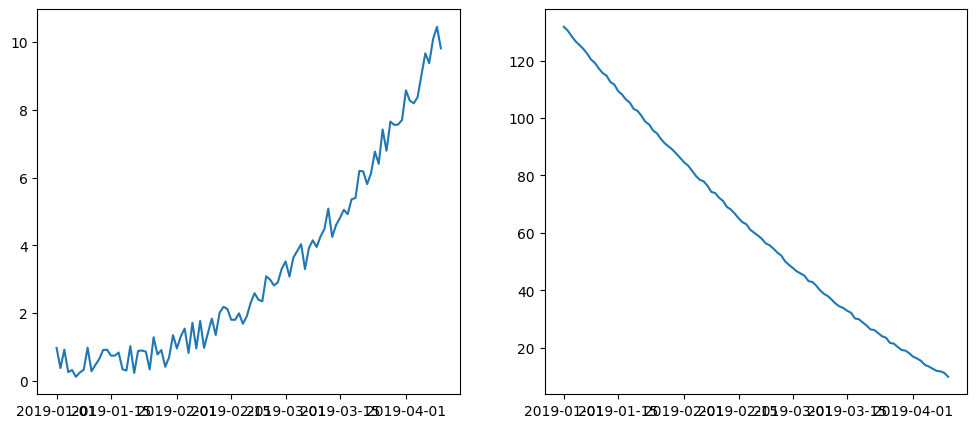

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(date, temperature)
axes[1].plot(date, price)

Text(0.5, 0.98, 'Temperature down, price up')

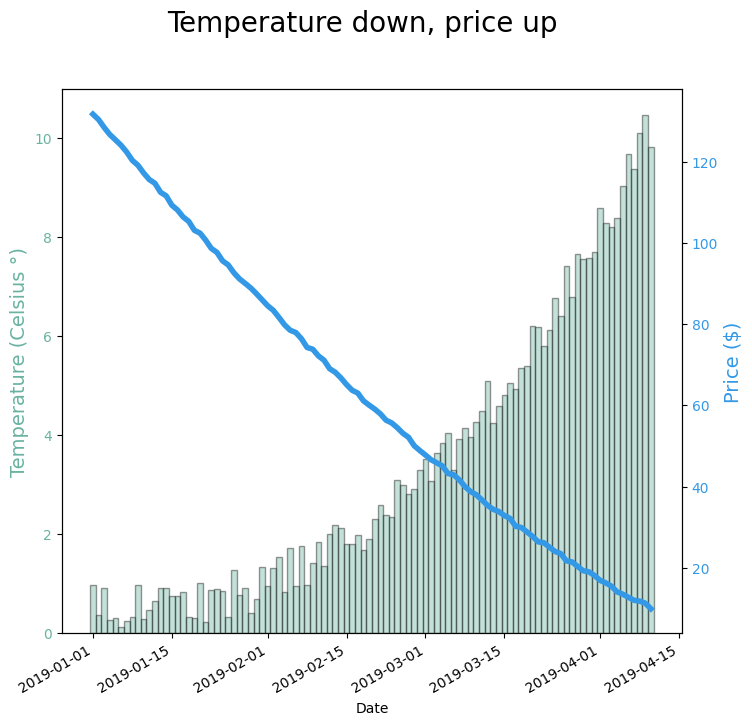

In [46]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx() # 오른쪽에 축 그리기

ax1.bar(date, temperature, color=COLOR_TEMPERATURE, edgecolor="black", alpha=0.4, width=1.0)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.autofmt_xdate()
fig.suptitle("Temperature down, price up", fontsize=20)

In [47]:
time = np.arange(12)
income = np.array([5, 9, 6, 6, 10, 7, 6, 4, 4, 5, 6, 4])
expenses = np.array([6, 6, 8, 3, 6, 9, 7, 8, 6, 6, 4, 8])

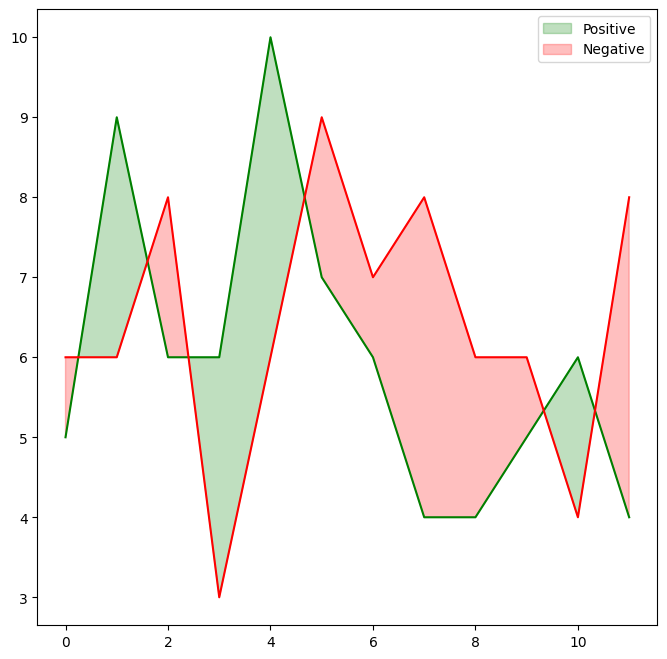

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines
ax.plot(time, income, color="green")
ax.plot(time, expenses, color="red")

# income > expenses 일 때 초록색으로 칠하고,
ax.fill_between(
    time, income, expenses, where=(income > expenses), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)

# income <= expenses 이면 빨간색으로 칠하기
ax.fill_between(
    time, income, expenses, where=(income <= expenses), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)

ax.legend()

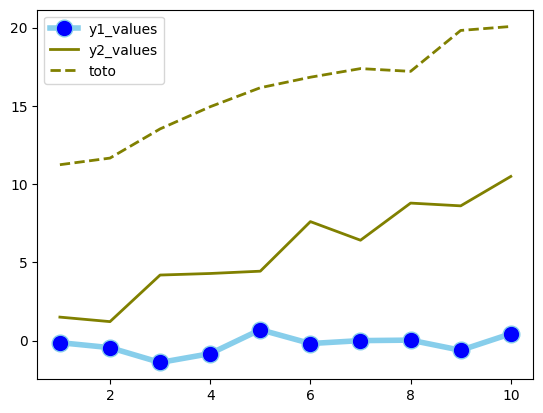

In [49]:
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12460\4210737045.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


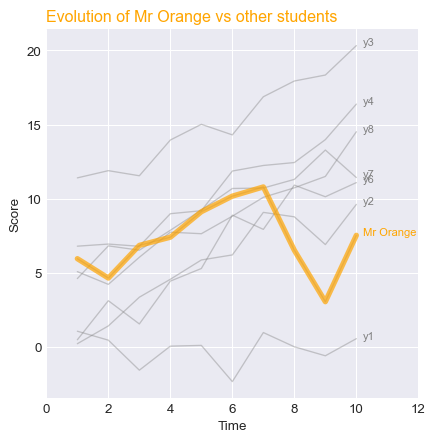

In [50]:
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
plt.style.use('seaborn-darkgrid')

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
for column in df.drop('x', axis=1):
    plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
plt.xlim(0,12)
 
# 어노테이션 넣기
num=0
for i in df.values[9][1:]:
    num+=1
    name=list(df)[num]
    if name != 'y5':
        plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')


plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12460\3896897859.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


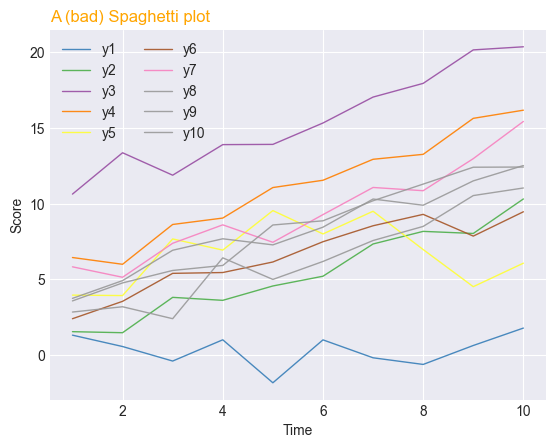

In [51]:
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })
 
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)
 
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_27152\3285575090.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


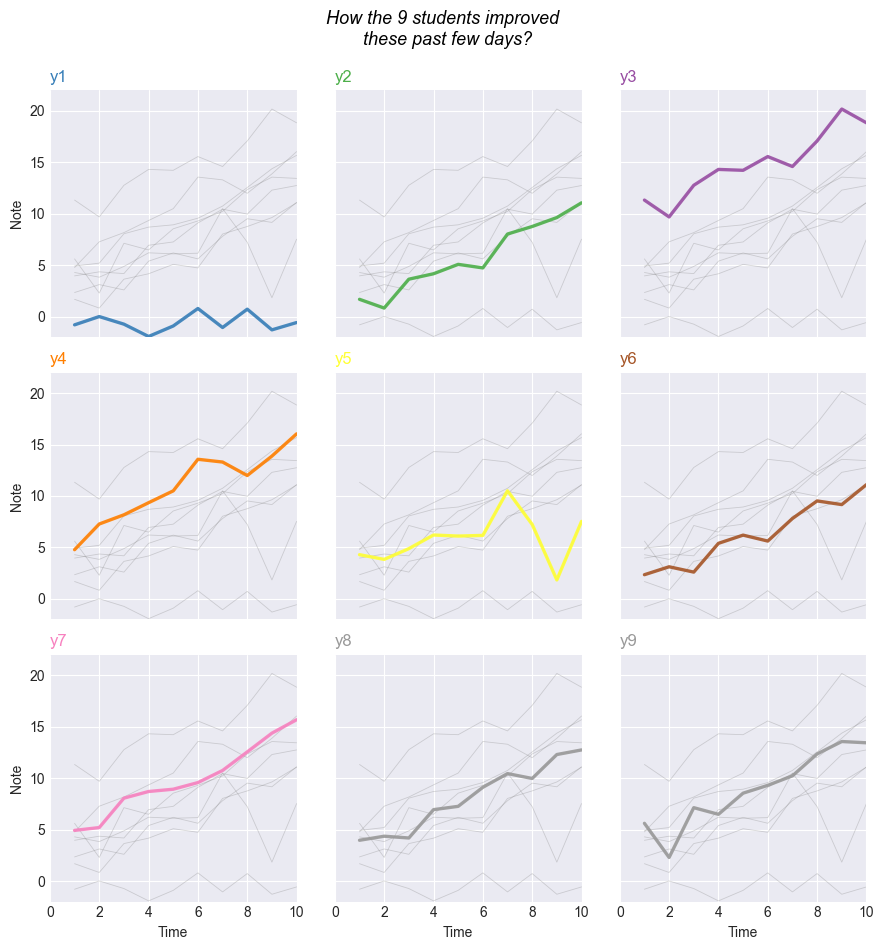

In [19]:
df=pd.DataFrame({'x': range(1,11), 
                 'y1': np.random.randn(10), 
                 'y2': np.random.randn(10)+range(1,11), 
                 'y3': np.random.randn(10)+range(11,21), 
                 'y4': np.random.randn(10)+range(6,16), 
                 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 
                 'y6': np.random.randn(10)+range(2,12), 
                 'y7': np.random.randn(10)+range(5,15), 
                 'y8': np.random.randn(10)+range(4,14), 
                 'y9': np.random.randn(10)+range(4,14) })

palette = plt.get_cmap('Set1')
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=3,
                        ncols=3, 
                        sharex=True, 
                        sharey=True,
                        figsize=(9,9))

num=0
for column in df.drop('x', axis=1):
    num+=1

    plt.subplot(3,3, num)
 
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], 
                 df[v], 
                 marker='', 
                 color='grey', 
                 linewidth=0.6, 
                 alpha=0.3)
 
    plt.plot(df['x'], 
             df[column], 
             marker='', 
             color=palette(num), 
             linewidth=2.4, 
             alpha=0.9, 
             label=column)
    plt.title(column, 
              loc='left', 
              fontsize=12, 
              fontweight=0, 
              color=palette(num) )
    
    if num in range(7) :
        pass
    else:
        plt.xlabel('Time')
    if num not in [1,4,7] :
        pass
    else:
        plt.ylabel('Note')
    
    plt.xlim(0,10)
    plt.ylim(-2,22)

plt.tight_layout()
plt.suptitle('How the 9 students improved \n these past few days?', 
             fontsize=13,
             fontweight = 0,
             color='black',
             style='italic',
             y=1.05)

plt.show()

In [2]:
df_mac_raw = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-12-22/big-mac.csv"
)
HIGHLIGHTS = ["EUZ", "CHE", "DNK", "SWE", "BRA", "ARG", "GBR", "USA"]

In [3]:
df_mac_raw["year"] = pd.DatetimeIndex(df_mac_raw["date"]).year

df_mac_raw = df_mac_raw[["date", "year", "iso_a3", "currency_code", "name", "dollar_price"]]

In [4]:
df_mac = df_mac_raw.groupby(["iso_a3", "name", "year"]).agg(
    price = ("dollar_price", "mean")
).reset_index()

group_sizes = df_mac.groupby("iso_a3").size()
keep = (group_sizes[group_sizes == 21]).index.tolist()
df_mac = df_mac[df_mac["iso_a3"].isin(keep)]

countries = df_mac[df_mac["year"] == 2008]["iso_a3"].tolist()
df_mac_indexed_2008 = df_mac[df_mac["iso_a3"].isin(countries)]
df_mac_indexed_2008["ref_year"] = 2008

In [5]:
df_price_index = df_mac_indexed_2008.groupby("iso_a3").apply(
   lambda x: x.iloc[np.where(x["year"] == 2008)]
).reset_index(drop=True)

df_price_index.rename(columns={"price": "price_index"}, inplace=True)

df_price_index = df_price_index[["iso_a3", "price_index"]]

df_mac_indexed_2008 = pd.merge(df_mac_indexed_2008, df_price_index, on = "iso_a3")

df_mac_indexed_2008["price_rel"] = df_mac_indexed_2008["price"] - df_mac_indexed_2008["price_index"]

df_mac_indexed_2008["group"] = np.where(
    df_mac_indexed_2008["iso_a3"].isin(HIGHLIGHTS),
    df_mac_indexed_2008["iso_a3"],
    "other"
)

df_mac_indexed_2008["group"] = pd.Categorical(
    df_mac_indexed_2008["group"], 
    ordered=True,  
    categories=sorted(HIGHLIGHTS) + ["other"]
)

In [6]:
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

VLINES = np.arange(2000, 2025, 5)

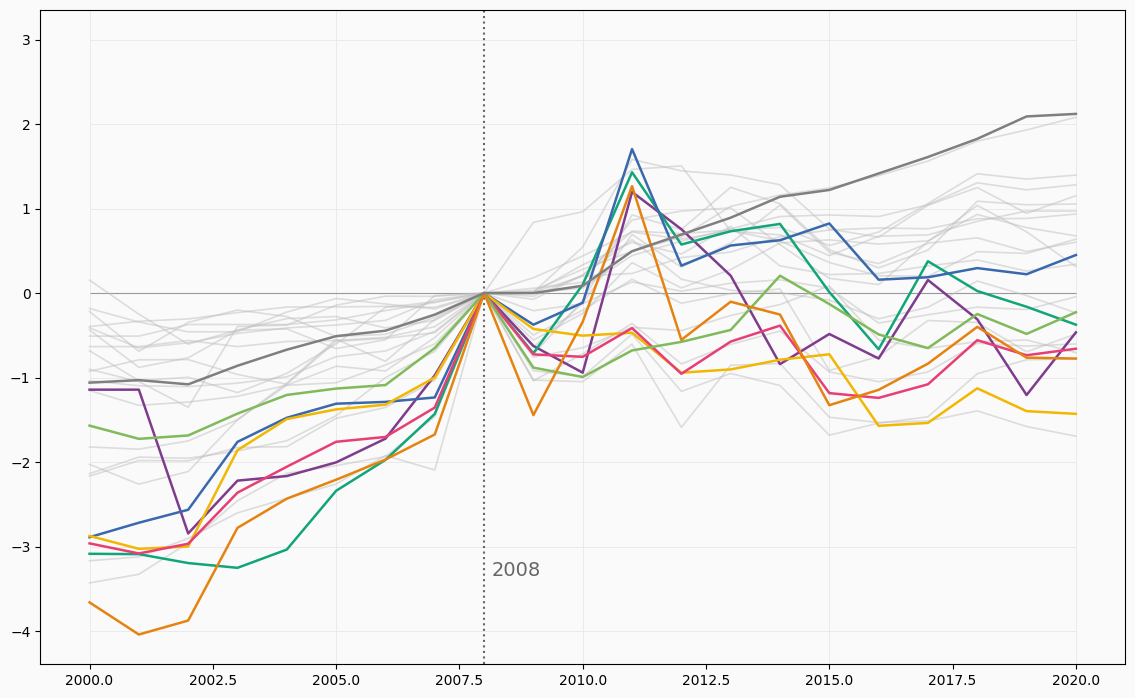

In [7]:
fig, ax = plt.subplots(figsize = (14, 8.5))

fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

ax.hlines(y=np.arange(-4, 4), xmin=2000, xmax=2020, color=GREY91, lw=0.6)

ax.hlines(y=0, xmin=2000, xmax=2020, color=GREY60, lw=0.8)

ax.axvline(2008, color=GREY40, ls="dotted")

ax.text(2008.15, -3.35, "2008", 
        fontsize=14, fontweight=500, color=GREY40, ha="left")

df_highlight = df_mac_indexed_2008[df_mac_indexed_2008["group"] != "other"]
df_others = df_mac_indexed_2008[df_mac_indexed_2008["group"] == "other"]

for group in df_others["iso_a3"].unique():
    data = df_others[df_others["iso_a3"] == group]
    ax.plot("year", "price_rel", c=GREY75, lw=1.2, alpha=0.5, data=data)

for idx, group in enumerate(df_highlight["iso_a3"].unique()):
    data = df_highlight[df_highlight["iso_a3"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("year", "price_rel", color=color, lw=1.8, data=data)

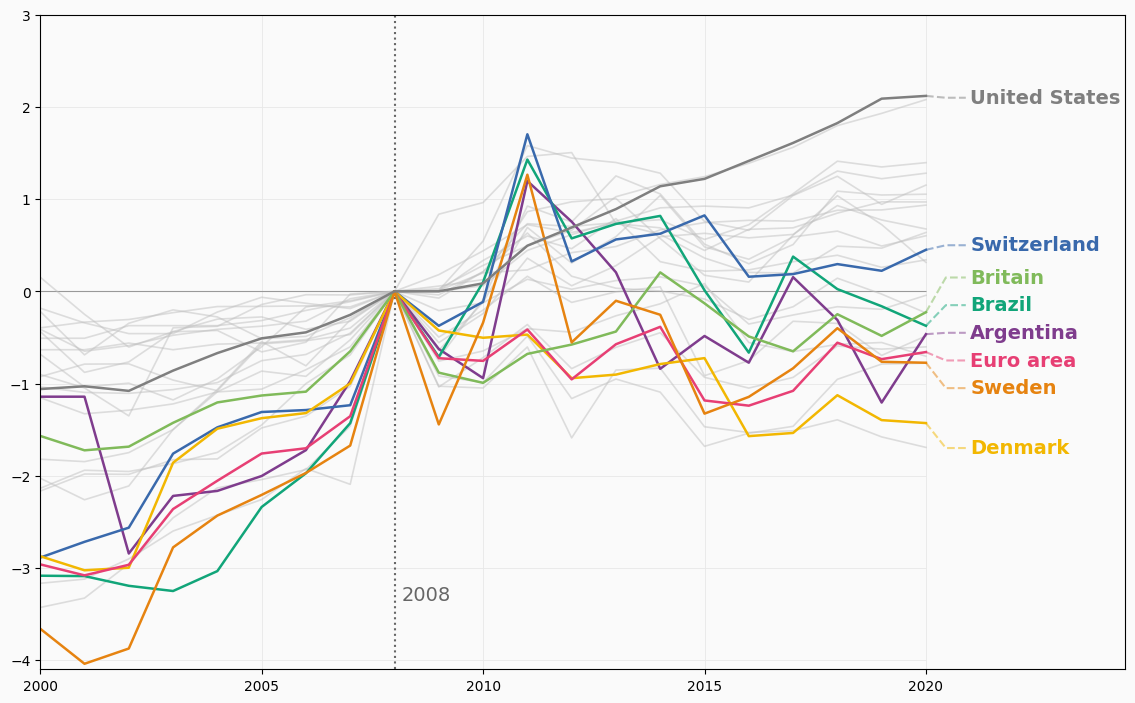

In [8]:
ax.set_xlim(2000, 2024.5)
ax.set_ylim(-4.1, 3)

# Positions
LABEL_Y = [
    -0.45,  # ARG
    -0.15,  # BRA
    0.5,    # CHE
    -1.7,   # DNK
    -0.75,  # EUZ
    0.15,   # GBR
    -1.05,  # SWE
    2.1     # USA
]

x_start = 2020
x_end = 2021
PAD = 0.1

for idx, group in enumerate(df_highlight["iso_a3"].unique()):
    data = df_highlight[(df_highlight["iso_a3"] == group) & (df_highlight["year"] == 2020)]
    color = COLOR_SCALE[idx]
    
    text = data["name"].values[0]
    
    y_start = data["price_rel"].values[0]
    y_end = LABEL_Y[idx]
    
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
    ax.text(
        x_end, 
        y_end, 
        text, 
        color=color, 
        fontsize=14, 
        weight="bold", 
        va="center"
    )
fig

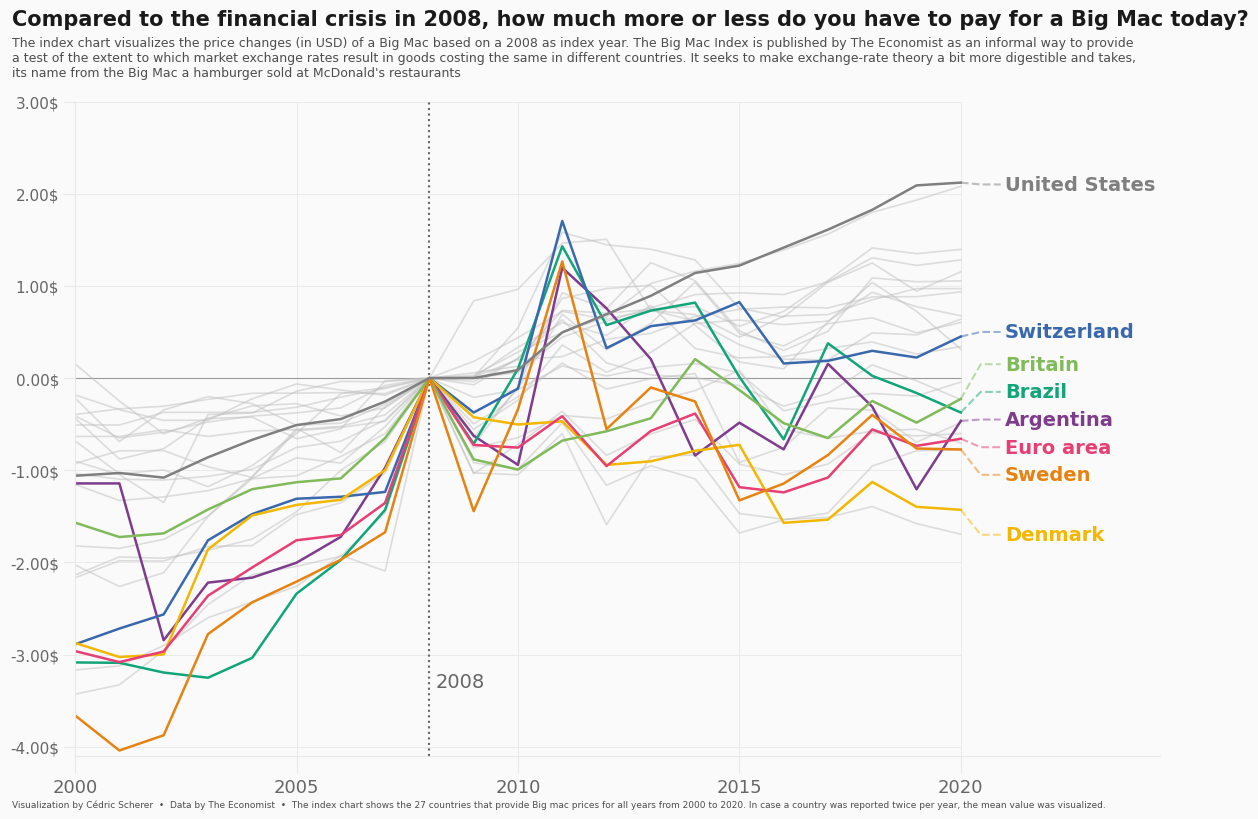

In [9]:
ax.set_yticks([y for y in np.arange(-4, 4)])
ax.set_yticklabels(
    [f"{y}.00$" for y in np.arange(-4, 4)],  
    fontsize=11,
    weight=500,
    color=GREY40
)

ax.set_xticks([x for x in np.arange(2000, 2025, 5)])
ax.set_xticklabels(
    [x for x in np.arange(2000, 2025, 5)], 
    fontsize=13,
    weight=500,
    color=GREY40
)

ax.tick_params(axis="x", length=12, color=GREY91)
ax.tick_params(axis="y", length=8, color=GREY91)

ax.spines["left"].set_color(GREY91)
ax.spines["bottom"].set_color(GREY91)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

subtitle = [
    "The index chart visualizes the price changes (in USD) of a Big Mac based on a 2008 as index year. The Big Mac Index is published by The Economist as an informal way to provide",
    "a test of the extent to which market exchange rates result in goods costing the same in different countries. It seeks to make exchange-rate theory a bit more digestible and takes,", 
    "its name from the Big Mac a hamburger sold at McDonald's restaurants", 
]

fig.text(
    0.08,
    0.97,
    "Compared to the financial crisis in 2008, how much more or less do you have to pay for a Big Mac today?",
    color=GREY10,
    fontsize=15,
    weight="bold"
)

fig.text(
    0.08,
    0.91,
    "\n".join(subtitle),
    ha="left",
    color=GREY30,
    fontsize=9,
)

fig.text(
    0.08, 
    0.05, 
    "Visualization by Cédric Scherer  •  Data by The Economist  •  The index chart shows the 27 countries that provide Big mac prices for all years from 2000 to 2020. In case a country was reported twice per year, the mean value was visualized.", 
    fontsize=6.5, 
    color=GREY30, 
    ha="left"
)

fig

In [10]:
animal_rescues = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-29/animal_rescues.csv")
gb_london_boroughs_grid = pd.read_csv("https://raw.githubusercontent.com/hafen/grid-designer/master/grids/gb_london_boroughs_grid.csv")

animal_rescues["animal_group_parent"] = animal_rescues["animal_group_parent"].str.capitalize()
borough_names = gb_london_boroughs_grid.rename(columns={"code_ons": "borough_code"})

In [11]:
rescues_borough = animal_rescues.query("cal_year < 2021").reset_index()

# 고양이와 고양이가 아닌걸로 변경
rescues_borough["animal_group_parent"] = np.where(
    rescues_borough["animal_group_parent"] == "Cat", "Cat", "Not_Cat"
)

rescues_borough = (
    rescues_borough.groupby(["cal_year", "borough_code", "animal_group_parent"])
    .size()
    .to_frame("n")
    .reset_index()
)

rescues_borough = rescues_borough.pivot(
    index=["cal_year", "borough_code"], 
    columns="animal_group_parent", 
    values="n"
).reset_index()

rescues_borough = pd.merge(rescues_borough, borough_names, how="left", on="borough_code")
rescues_borough = rescues_borough.dropna(subset=["name"])

In [12]:
# python은 0부터 시작이라서
rescues_borough["row"] -= 1
rescues_borough["col"] -= 1

In [13]:
df_idxs = rescues_borough[["row", "col", "name"]].drop_duplicates()
NAMES = df_idxs["name"].values
ROWS = df_idxs["row"].values.astype(int)
COLS = df_idxs["col"].values.astype(int)

In [14]:
BLUE = "#3D85F7"
BLUE_LIGHT = "#5490FF"
PINK = "#C32E5A"
PINK_LIGHT = "#D34068"
GREY40 = "#666666"
GREY25 = "#404040"
GREY20 = "#333333"
BACKGROUND = "#F5F4EF"

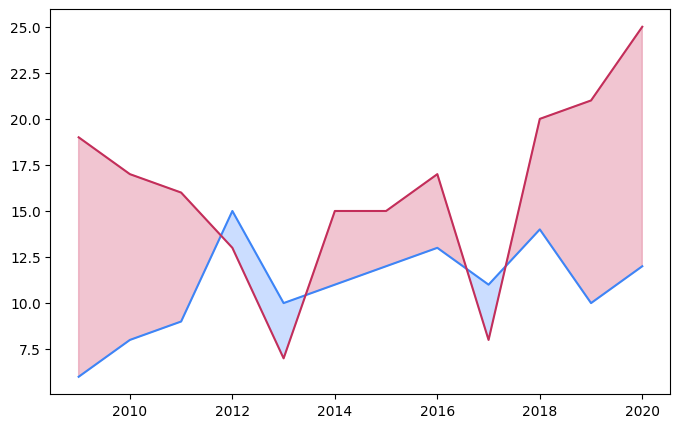

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

df = rescues_borough[rescues_borough["name"] == "Enfield"]

YEAR = df["cal_year"].values
CAT = df["Cat"].values
NOT_CAT = df["Not_Cat"].values

ax.plot(YEAR, CAT, color=BLUE)
ax.plot(YEAR, NOT_CAT, color=PINK)

# cat > not cat 이면 파란색으로 칠하고
ax.fill_between(
    YEAR, CAT, NOT_CAT, where=(CAT > NOT_CAT), 
    interpolate=True, color=BLUE_LIGHT, alpha=0.3
)
# cat < not cat 이면 빨간색으로 칠하기
ax.fill_between(
    YEAR, CAT, NOT_CAT, where=(CAT <= NOT_CAT),
    interpolate=True, color=PINK_LIGHT, alpha=0.3
)

In [16]:
ax.set_facecolor(BACKGROUND)
fig.set_facecolor(BACKGROUND)

# x축 커스텀
xticks = [2010, 2015, 2020]
ax.set_xticks(xticks)
ax.set_xticks([2012.5, 2017.5], minor=True)
ax.set_xticklabels(xticks, color=GREY40)

# y축 커스텀
yticks = [0, 10, 20]
ax.set_yticks(yticks)
ax.set_yticks([5, 15, 25], minor=True)
ax.set_yticklabels(yticks, color=GREY40)
ax.set_ylim((-1, 26))

# 그리드 추가
ax.grid(which="minor", lw=0.4, alpha=0.4)
ax.grid(which="major", lw=0.8, alpha=0.4)

ax.yaxis.set_tick_params(which="both", length=0)
ax.xaxis.set_tick_params(which="both", length=0)

# 축 제거
ax.spines["left"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_title("Enfield", weight="bold", color=GREY20, rotation=-15)


Text(0.5, 1.0, 'Enfield')

In [24]:
# 위 과정 함수화
def single_plot(x, y1, y2, name, ax):
    
    ax.plot(x, y1, color=BLUE)
    ax.plot(x, y2, color=PINK)

    ax.fill_between(
        x, y1, y2, where=(y1 > y2), 
        interpolate=True, color=BLUE_LIGHT, alpha=0.3
    )

    ax.fill_between(
        x, y1, y2, where=(y1 <= y2),
        interpolate=True, color=PINK_LIGHT, alpha=0.3
    )

    ax.set_facecolor(BACKGROUND)
    fig.set_facecolor(BACKGROUND)


    xticks = [2010, 2015, 2020]
    ax.set_xticks(xticks)
    ax.set_xticks([2012.5, 2017.5], minor=True)
    ax.set_xticklabels(xticks, color=GREY40, size=10)

    yticks = [0, 10, 20]
    ax.set_yticks(yticks)
    ax.set_yticks([5, 15, 25], minor=True)
    ax.set_yticklabels(yticks, color=GREY40, size=10)
    ax.set_ylim((-1, 26))

    ax.grid(which="minor", lw=0.4, alpha=0.4)
    ax.grid(which="major", lw=0.8, alpha=0.4)
    
    ax.yaxis.set_tick_params(which="both", length=0)
    ax.xaxis.set_tick_params(which="both", length=0)
    
    ax.spines["left"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.set_title(name, 
                 weight="bold", 
                 size=7, 
                 color=GREY20)

In [25]:
NROW = len(rescues_borough["row"].unique())
NCOL = len(rescues_borough["col"].unique())

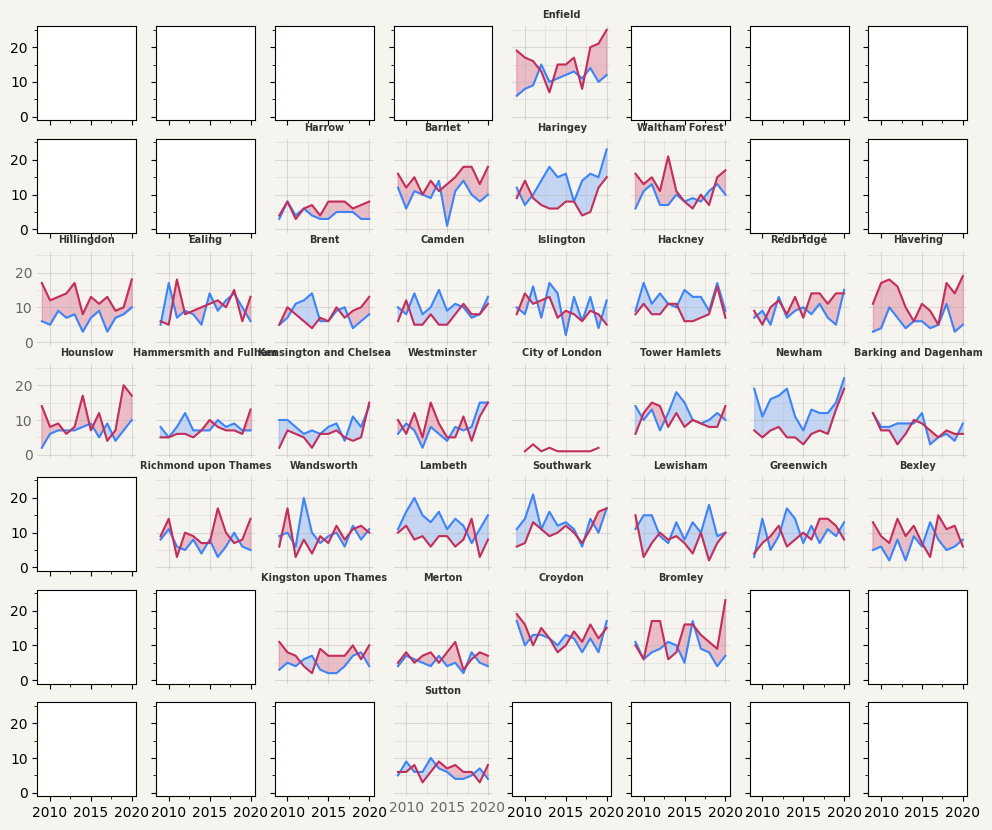

In [26]:
fig, axes = plt.subplots(NROW, NCOL, figsize=(12, 10), sharex=True, sharey=True)

for i, name in enumerate(NAMES):
    df = rescues_borough[rescues_borough["name"] == name]

    ax = axes[ROWS[i], COLS[i]]
    
    # x는 year / y1,y2는 고양이랑 고양이가 아닌 수
    YEAR = df["cal_year"].values
    CAT = df["Cat"].values
    NOT_CAT = df["Not_Cat"].values
    
    single_plot(YEAR, CAT, NOT_CAT, name, ax)

In [27]:
for i in range(7):
    for j in range(8):
        # subplots를 돌면서 line이 있으면 pass 없으면 나머지 그래프들 지우기
        if axes[i, j].lines:
            continue
        else:
            axes[i, j].remove()

In [28]:
for i in range(7):
    first_in_row = True
    for j in range(8):
        # 왼쪽 틱만 남기기 위한 작업, 즉, sharey 하기 위함
        if first_in_row and axes[i, j].lines:
            axes[i, j].yaxis.set_tick_params(labelleft=True)
            first_in_row = False


# 패널을 아래에서 위로 훑기
for j in range(8):
    first_in_col = True
    for i in reversed(range(7)): # reversed 이용
        # 아래쪽 틱만 남기기 위한 작업, 즉, sharex 하기 위함
        if first_in_col and axes[i, j].lines:
            axes[i, j].xaxis.set_tick_params(labelbottom=True)
            first_in_col = False

In [29]:
handles = [
    Line2D([], [], c=color, lw=1.2, label=label)
    for label, color in zip(["cats", "other"], [BLUE, PINK])
]

fig.legend(
    handles=handles,
    loc=(0.75, 0.94), # This coord is bottom-left corner
    ncol=2,           # 1 row, 2 columns layout
    columnspacing=1,  # Space between columns
    handlelength=1.2, # Line length
    frameon=False     # No frame
)


# Create handles for the area fill with `patches.Patch()`
cats = patches.Patch(facecolor=BLUE_LIGHT, alpha=0.3, label="more cats")
other = patches.Patch(facecolor=PINK_LIGHT, alpha=0.3, label="more other")

fig.legend(
    handles=[cats, other],
    loc=(0.75, 0.9), # This coord is bottom-left corner
    ncol=2,          # 1 row, 2 columns layout
    columnspacing=1, # Space between columns
    handlelength=2,  # Area length
    handleheight=2,  # Area height
    frameon=False,   # No frame
)


fig.text(
    x=0.05, y=0.975, s="Rescues of\ncats vs other animals by\nthe London fire brigade\n2009-2020",
    color=GREY25, fontsize=26, fontweight="bold",
    ha="left", # 'x' is the left limit of the title
    va="top",  # 'y' is the top limit of the title
    ma="left"  # multiple lines are aligned to the left
)

# 캡션
fig.text(
    x=0.95, y=0.025, s="Source: London.gov · Graphic: Georgios Karamanis", 
    fontsize=11, 
    ha="right",   # 'x' is the right location of the caption
    va="baseline" # 'y' is the base location of the caption
)

# 그래프 간 패딩
# fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.3, wspace=0.28)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

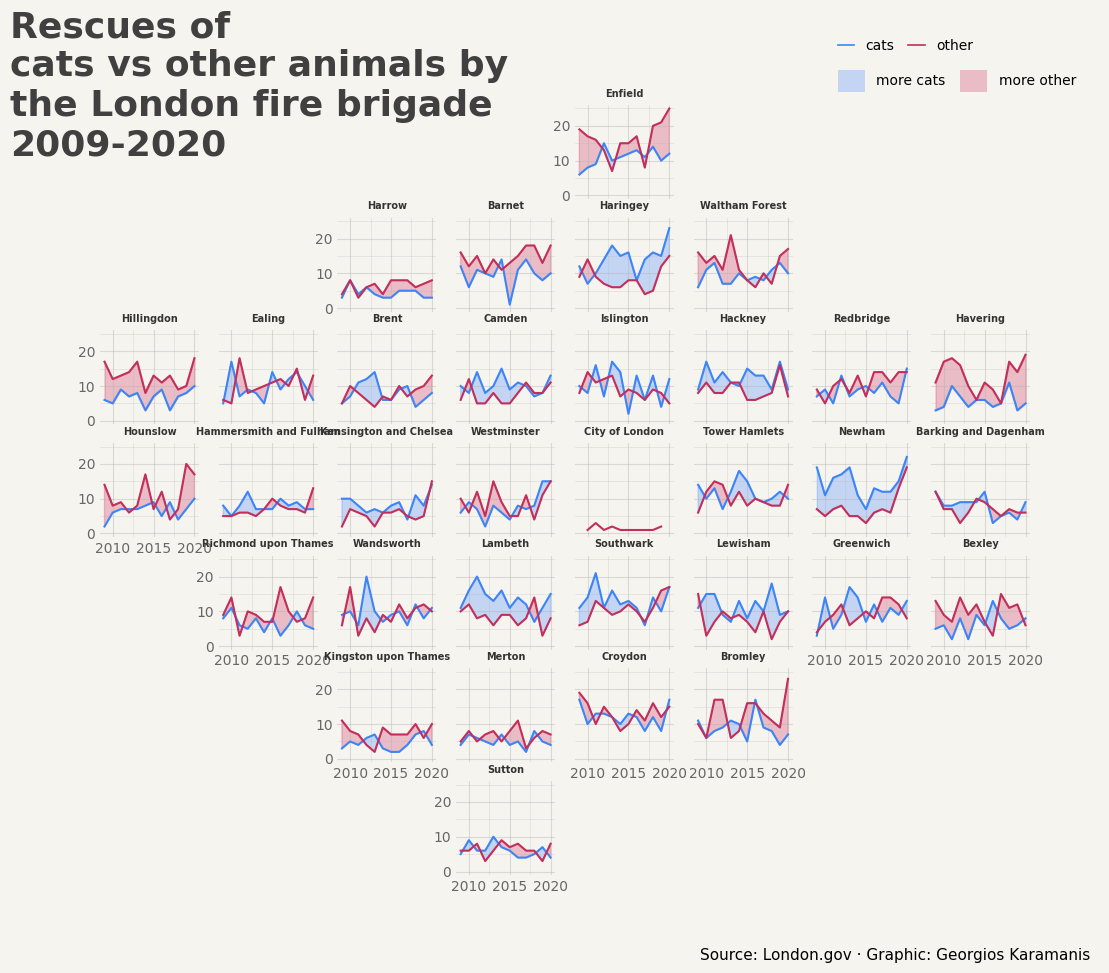

In [30]:
fig

In [32]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-04/water.csv")
data = (
    data_raw
    .dropna(subset=["install_year", "country_name"])
    .assign(
        install_decade = (data_raw["install_year"] // 10) * 10,
    )
    .query("1970 <= install_decade <= 2020")
)

In [33]:
data["nb_install"] = data.groupby(["country_name", "install_decade"])["country_name"].transform("size") 

In [34]:
data_pivoted = pd.pivot_table(
    data, index="country_name", values="nb_install", columns="install_decade"
).dropna().reset_index()

data = pd.melt(data_pivoted, id_vars = "country_name", value_name="nb_install", var_name="decade")
data.head()

country_name  decade  nb_install
0     Ethiopia  1970.0         1.0
1        Ghana  1970.0       566.0
2        Kenya  1970.0       106.0
3      Liberia  1970.0        33.0
4      Nigeria  1970.0       334.0

In [35]:
data["country_name"] = data["country_name"].str.upper()
data["rank"] = data.groupby("decade")["nb_install"].transform(lambda x: rankdata(-x))
data = data.sort_values(["country_name", "decade"])
data

country_name  decade  nb_install  rank
0      ETHIOPIA  1970.0         1.0  12.0
12     ETHIOPIA  1980.0        38.0  11.0
24     ETHIOPIA  1990.0       405.0  11.0
36     ETHIOPIA  2000.0     15132.0   3.0
48     ETHIOPIA  2010.0      4911.0   6.0
..          ...     ...         ...   ...
23     ZIMBABWE  1980.0      4055.0   2.0
35     ZIMBABWE  1990.0      5257.0   4.0
47     ZIMBABWE  2000.0      2338.0   8.0
59     ZIMBABWE  2010.0      3334.0   7.0
71     ZIMBABWE  2020.0        35.0   7.0

[72 rows x 4 columns]

In [36]:
COUNTRIES = data["country_name"].unique()
COUNTRY = COUNTRIES[0]

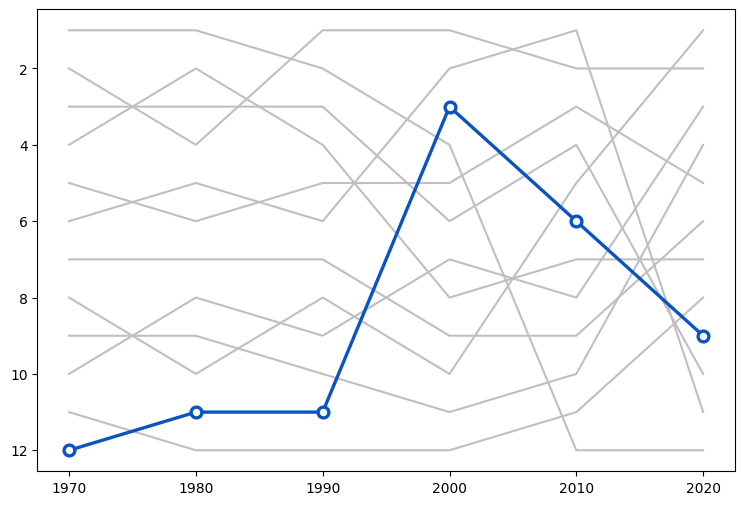

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.invert_yaxis()

for country in COUNTRIES:
    d = data[data["country_name"] == country] 
    x = d["decade"].values
    y = d["rank"].values

    if country == COUNTRY:
        ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
        ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)      

    else:
        ax.plot(x, y, color="#BFBFBF", lw=1.5)

In [38]:
def add_label(x, y, fontsize, ax):
    PAD = 0.4
    ax.annotate(
        f"#{int(y)} in\n{str(int(x))[2:]}s", 
        xy=(x, y - PAD), 
        ha="center", 
        va="bottom",
        fontsize=fontsize,
        zorder=12
    )

Text(0.5, 1.0, 'ETHIOPIA')

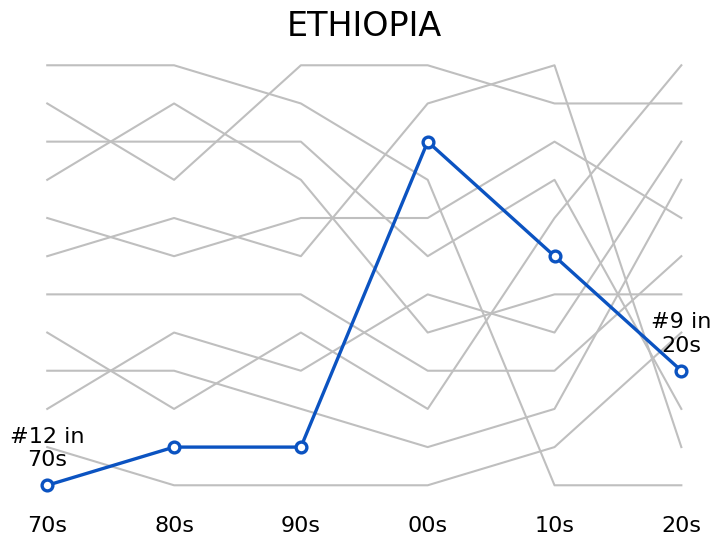

In [40]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.invert_yaxis()

for country in COUNTRIES:
    d = data[data["country_name"] == country] 
    x = d["decade"].values
    y = d["rank"].values
    
    if country == COUNTRY:
        ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
        ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
        
        add_label(x[0], y[0], 16, ax)
        add_label(x[-1], y[-1], 16,ax)
    else:
        ax.plot(x, y, color="#BFBFBF", lw=1.5)

ax.set_yticks([])
ax.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])

ax.set_xticklabels(
    ["70s", "80s", "90s", "00s", "10s", "20s"], 
    fontsize=16
)
ax.tick_params(bottom=False)

ax.set_frame_on(False)

ax.set_title(COUNTRY, fontsize=24, fontweight=500)

In [41]:
# 위 테스트 함수화
def plot_country(country, data, annotate, ax):
    
    for country_inner in COUNTRIES:
        d = data[data["country_name"] == country_inner] 
        x = d["decade"].values
        y = d["rank"].values

        if country_inner == country:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
            if annotate:
                add_label(x[0], y[0], 10, ax)
                add_label(x[-1], y[-1], 10, ax)
        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)

    ax.set_yticks([])
    ax.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
    ax.set_xticklabels(
        ["70s", "80s", "90s", "00s", "10s", "20s"], 
        fontsize=10
    )
    ax.tick_params(bottom=False)
    ax.set_frame_on(False)

    ax.set_title(country, fontsize=14, fontweight=500)
    
    return ax

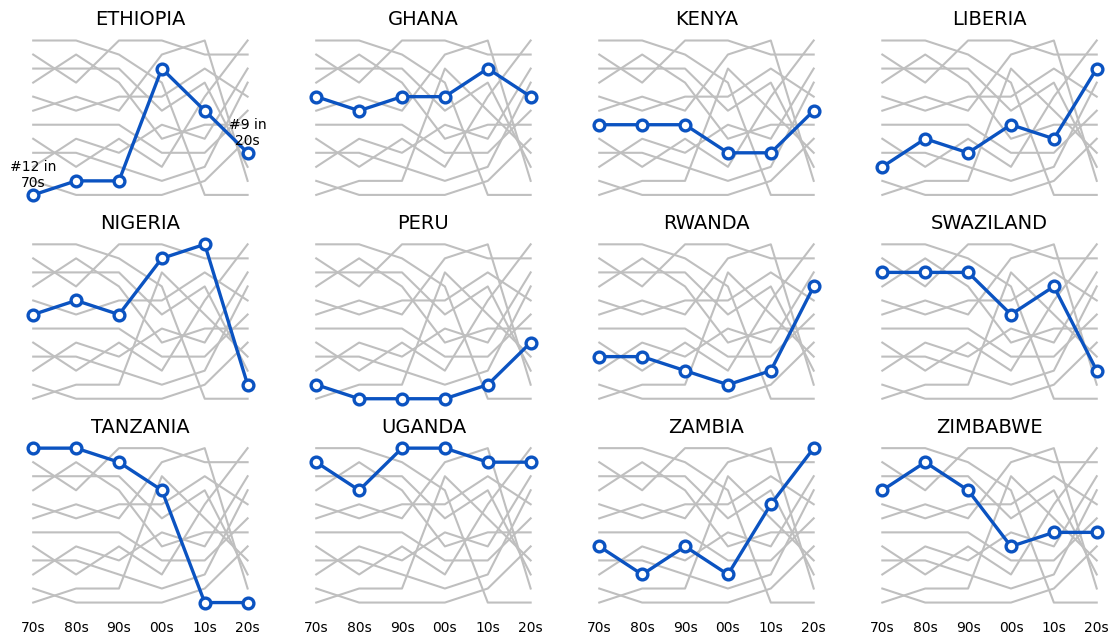

In [42]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(14, 7.5))
for idx, (ax, country) in enumerate(zip(axes.ravel(), COUNTRIES)):

    annotate = idx == 0
    plot_country(country, data, annotate, ax)

ax.invert_yaxis()

In [43]:
fig.subplots_adjust(wspace=0.1, left=0.025, right=0.975, bottom=0.11, top=0.82)

fig.text(
    x=0.5, 
    y=0.92,
    s="RANKING SOME COUNTRIES BY THE NUMBER\nOF WATER SOURCES INSTALLATIONS BY DECADE",
    ha="center",
    va="center",
    ma="center",
    fontsize=22,
    fontweight="bold"
)

fig.text(
    x=0.975,
    y=0.05,
    s="Data from Water Point Data Exchange",
    ha="right",
    ma="right",
    fontsize=8
)

fig.text(
    x=0.975,
    y=0.03,
    s="@issa_madjid",
    ha="right",
    ma="right",
    fontsize=8,
    fontweight="bold", 
)

fig.set_facecolor("#f9fbfc")

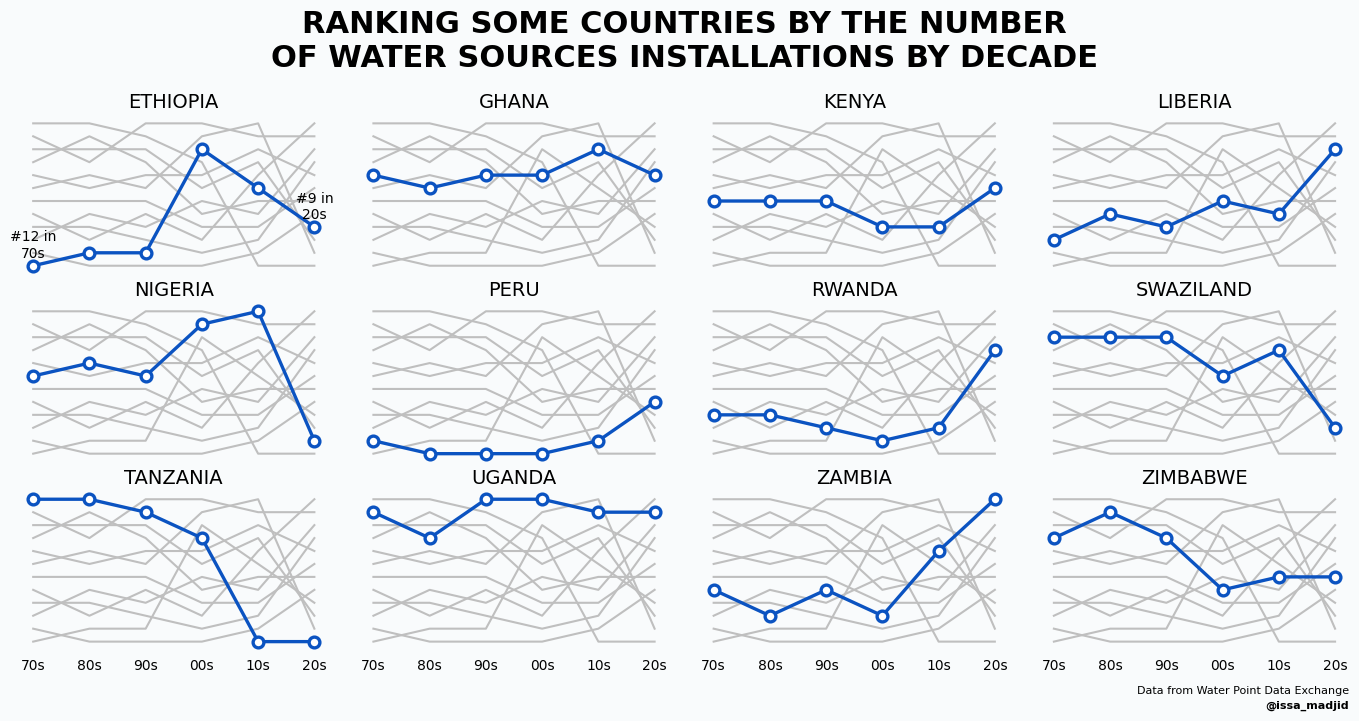

In [44]:
fig

In [46]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

In [47]:
year = [2008, 2012, 2016, 2020]

latin_america = [10, 9, 7.5, 5.8]
asia_and_pacific = [13.5, 9.5, 7.5, 5.5]
sub_saharan_africa = [25.5, 21, 22.2, 24]
percentages = [sub_saharan_africa, asia_and_pacific, latin_america]

COLORS = [BLUE, GREEN, BROWN]

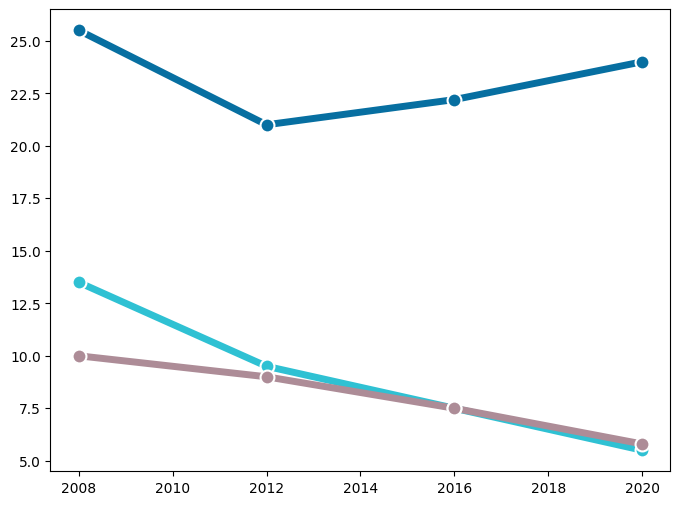

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

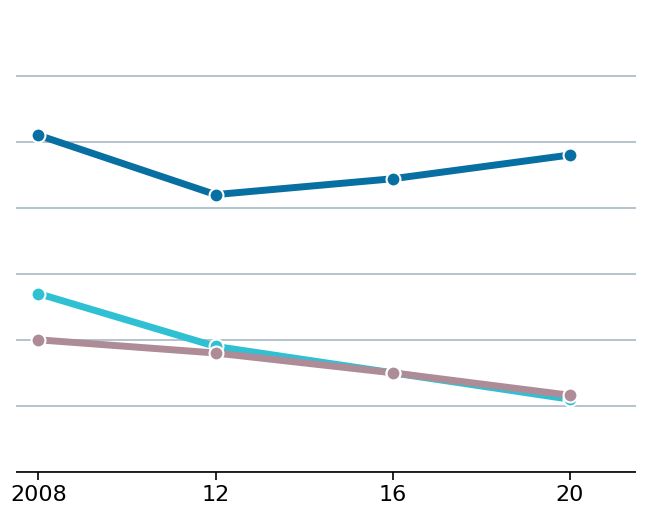

In [60]:
ax.yaxis.set_ticks([i * 5 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

ax.set_axisbelow(True)

ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

ax.set_ylim(0, 35)
ax.set_xlim(2007.5, 2021.5)

fig

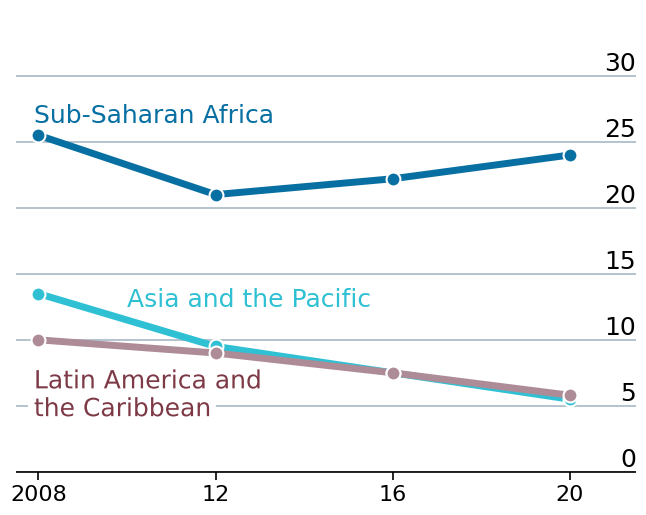

In [61]:
PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18, fontweight=100
    )

path_effects = [withStroke(linewidth=10, foreground="white")]

def add_region_label(x, y, text, color, path_effects, ax):
    ax.text(
        x, y, text, color=color, fontsize=18, 
        va="center", ha="left", path_effects=path_effects
    ) 
region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN_DARKER, "path_effects": path_effects},
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": GREEN, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=ax)

fig

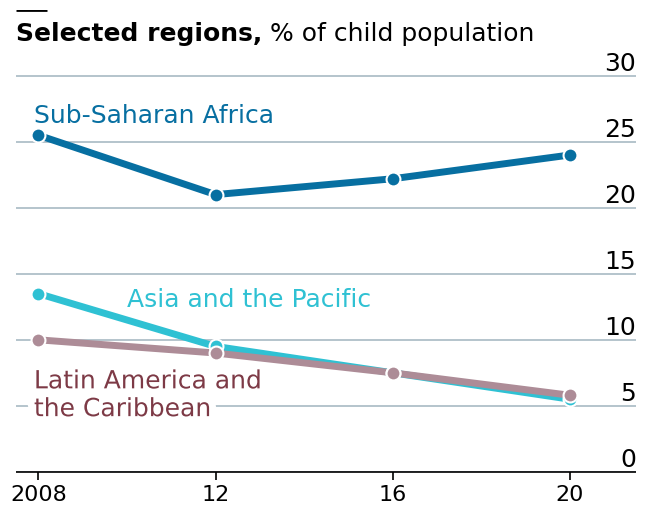

In [62]:
text = "<size:18><weight:bold>Selected regions,</> % of child population</>"
flexitext(0, 0.975, text, va="top", ax=ax)
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)
fig

In [64]:
COLORS += [GREY]
counts = [
    [65, 55, 67, 85],
    [130, 85, 65, 50],
    [10, 10, 10, 8],
    [60, 20, 10, 16]
    
]

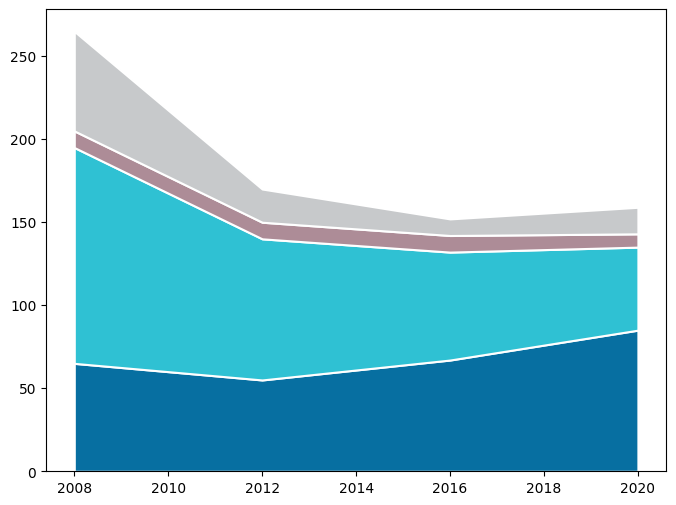

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.stackplot(year, 
             counts, 
             colors=COLORS, 
             lw=1.5, 
             edgecolor='white')

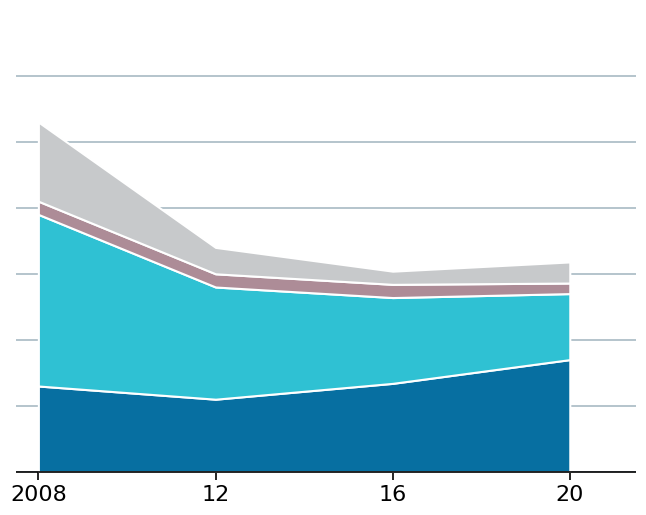

In [89]:
ax.yaxis.set_ticks([i * 50 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

ax.set_axisbelow(True)

ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

ax.set_ylim(0, 350)
ax.set_xlim(2007.5, 2021.5)

fig

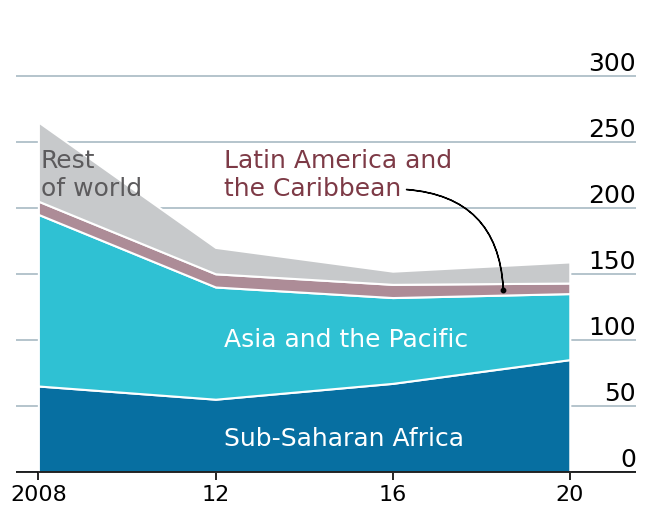

In [90]:
PAD = 350 * 0.01
for label in [i * 50 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,fontweight=100
    )
    
region_labels = [
    {"x": 2012.2, "y": 225, "text": "Latin America and\nthe Caribbean", "color": BROWN_DARKER, "path_effects":[]},
    {"x": 2012.2, "y": 100, "text": "Asia and the Pacific", "color": "white", "path_effects":[]},
    {"x": 2012.2, "y": 25, "text": "Sub-Saharan Africa", "color": "white", "path_effects":[]},
    {"x": 2008.05, "y": 225, "text": "Rest\nof world", "color": GREY_DARKER, "path_effects":[]},
]    

for label in region_labels:
    add_region_label(**label, ax=ax)

ax.add_artist(
    patches.FancyArrowPatch(
        (2016.25, 214), (2018.5, 137),
        arrowstyle = "Simple", 
        connectionstyle="arc3, rad=-0.45",
        color="k"
    )
)

ax.scatter(2018.5, 138, s=10, color="k")    
    
    
fig

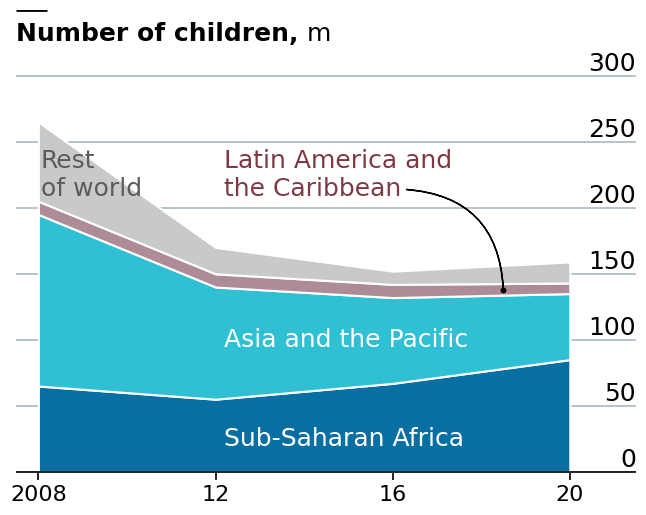

In [91]:
text = "<size:18><weight:bold>Number of children,</> m</>"
flexitext(0, 0.975, text, va="top", ax=ax)

# Same line on top of title
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)

fig

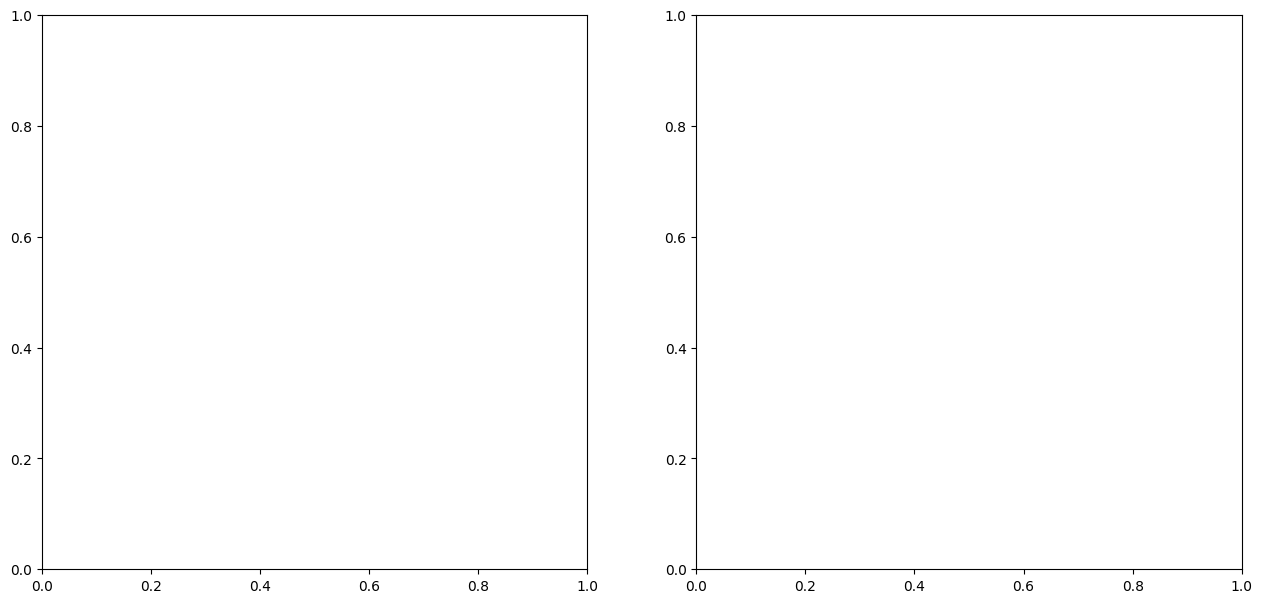

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7.2))
fig.subplots_adjust(left=0, right=1)

fig.set_facecolor("w")

In [93]:
def customize_axis(ax):
   # Make gridlines be below most artists.
    ax.set_axisbelow(True)

    # Add grid lines
    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

    # Customize x-axis ticks
    ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
    ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontweight=100)
    ax.xaxis.set_tick_params(length=6, width=1.2)
    
    # Remove all spines but the one in the bottom
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Customize bottom spine
    ax.spines["bottom"].set_lw(1.2)
    ax.spines["bottom"].set_capstyle("butt") 

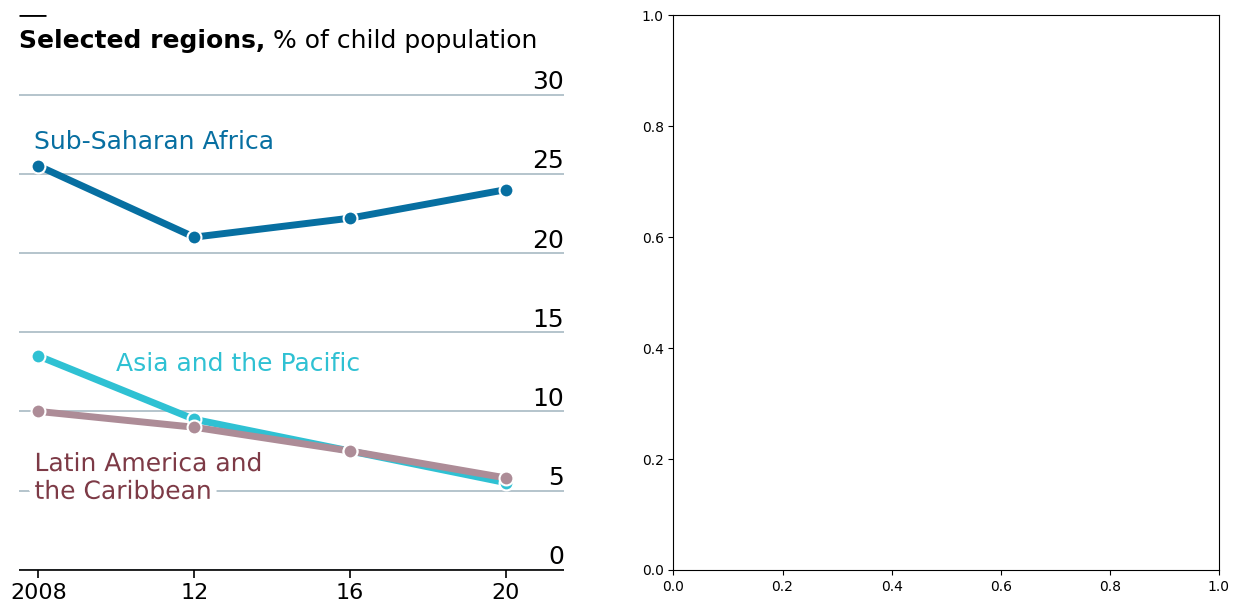

In [94]:
for percentage, color in zip(percentages, COLORS):
    axes[0].plot(year, percentage, color=color, lw=5)
    axes[0].scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

axes[0].yaxis.set_ticks([i * 5 for i in range(0, 7)])
axes[0].yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
axes[0].yaxis.set_tick_params(labelleft=False, length=0)

customize_axis(axes[0])

axes[0].set_ylim(0, 35)
axes[0].set_xlim(2007.5, 2021.5)

PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    axes[0].text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18, fontweight=100
    )

path_effects = [withStroke(linewidth=10, foreground="white")]
region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN_DARKER, "path_effects": path_effects},
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": GREEN, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=axes[0])

text = "<size:18><weight:bold>Selected regions,</> % of child population</>"
flexitext(0, 0.975, text, va="top", ax=axes[0])
axes[0].add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=axes[0].transAxes
    )
)
fig

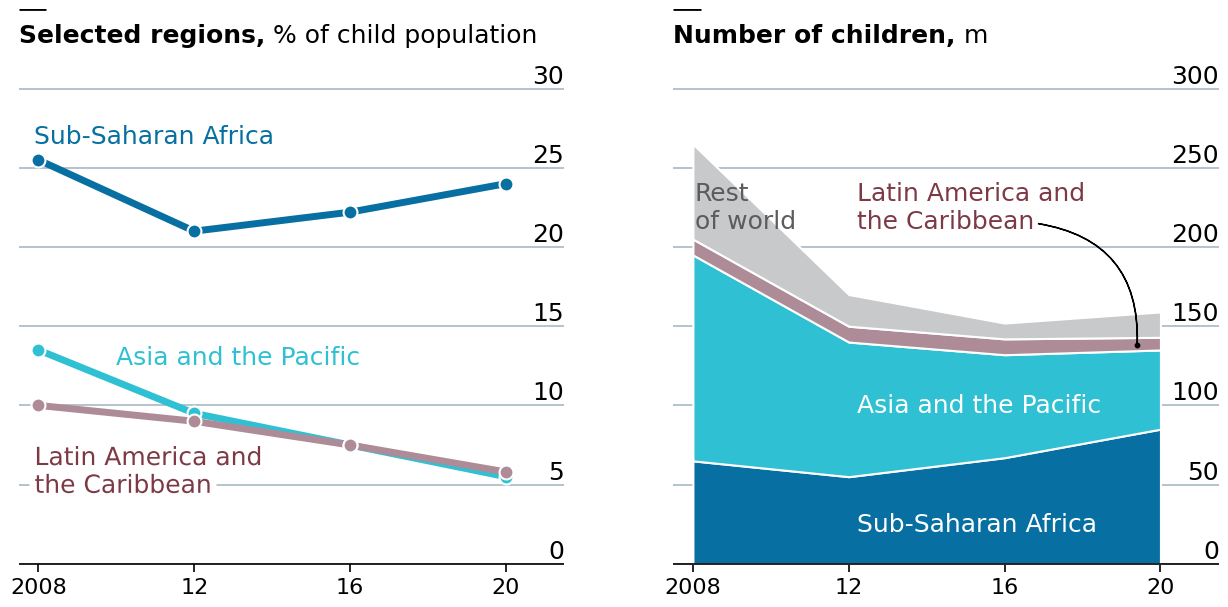

In [95]:
axes[1].stackplot(year, counts, colors=COLORS, lw=1.5, edgecolor='white')

axes[1].yaxis.set_ticks([i * 50 for i in range(0, 7)])
axes[1].yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
axes[1].yaxis.set_tick_params(labelleft=False, length=0)

customize_axis(axes[1])

axes[1].set_ylim(0, 350)
axes[1].set_xlim(2007.5, 2021.5)

PAD = 350 * 0.01
for label in [i * 50 for i in range(0, 7)]:
    axes[1].text(
        2021.5, label + PAD, label, 
        ha="right", va="baseline", fontsize=18,fontweight=100
    )
    

region_labels = [
    {"x": 2012.2, "y": 225, "text": "Latin America and\nthe Caribbean", "color": BROWN_DARKER, "path_effects":[]},
    {"x": 2012.2, "y": 100, "text": "Asia and the Pacific", "color": "white", "path_effects":[]},
    {"x": 2012.2, "y": 25, "text": "Sub-Saharan Africa", "color": "white", "path_effects":[]},
    {"x": 2008.05, "y": 225, "text": "Rest\nof world", "color": GREY_DARKER, "path_effects":[]},
]   

for label in region_labels:
    add_region_label(**label, ax=axes[1])


axes[1].add_artist(
    patches.FancyArrowPatch(
        (2016.8, 215), (2019.4, 137),
        arrowstyle = "Simple", 
        connectionstyle="arc3, rad=-0.45",
        color="k"
    )
)

axes[1].scatter(2019.4, 138, s=10, color="k")

text = "<size:18><weight:bold>Number of children,</> m</>"
flexitext(0, 0.975, text, va="top", ax=axes[1])

axes[1].add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2, color="black",
        solid_capstyle="butt", transform=axes[1].transAxes
    )
)

fig

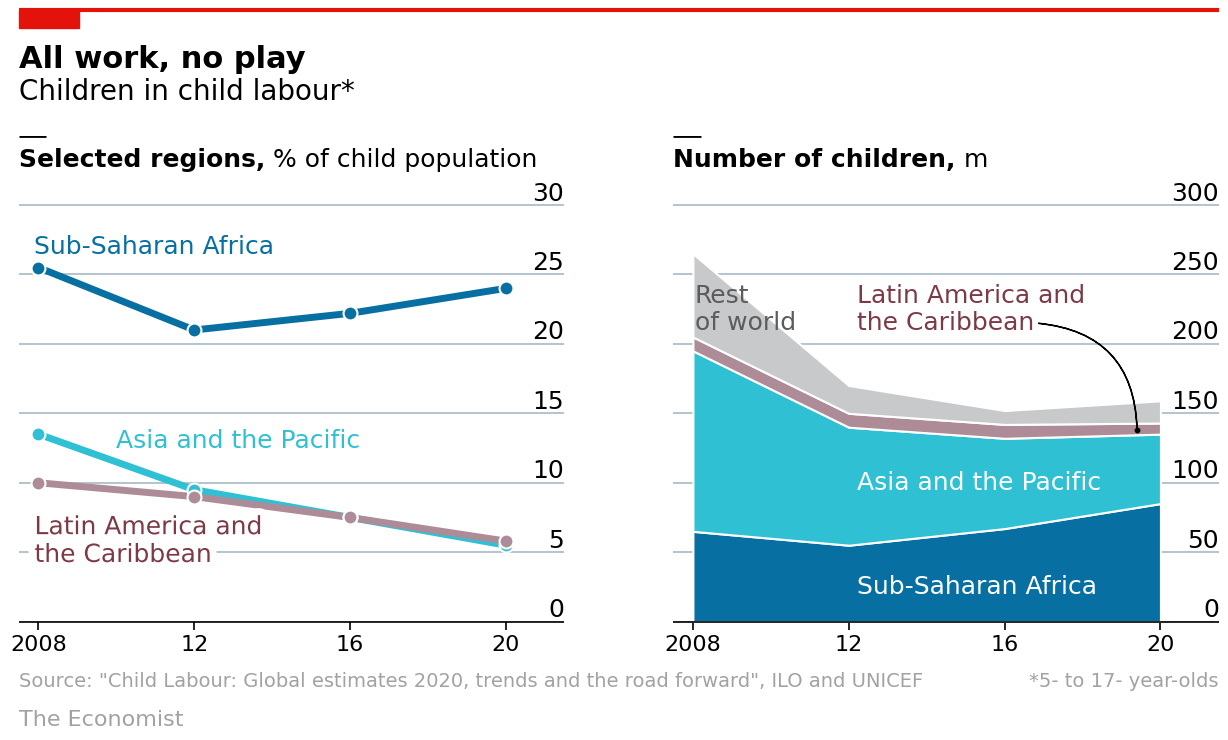

In [96]:
fig.subplots_adjust(top=0.825, bottom=0.15)

fig.text(
    0, 0.92, "All work, no play", 
    fontsize=22,
    fontweight="bold"
)
fig.text(
    0, 0.875, "Children in child labour*", 
    fontsize=20
)

source = 'Source: "Child Labour: Global estimates 2020, trends and the road forward", ILO and UNICEF'
fig.text(
    0, 0.06, source, color="#a2a2a2", 
    fontsize=14
)
fig.text(
    1, 0.06, "*5- to 17- year-olds", color="#a2a2a2", ha="right",
    fontsize=14
)
fig.text(
    0, 0.005, "The Economist", color="#a2a2a2",
    fontsize=16
)

fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))
fig

In [98]:
class Probabilities:
    def __init__(self, grid, auth, responses, programs):
        self.grid = grid
        self.auth = auth
        self.responses = responses
        self.programs = programs

    def compute(self, j):
        eta = self.grid * self._auth_coef() + self._program_coef(j)
        n_responses = len(self.responses["mean"]) + 1
        probs = [0] * n_responses
        for i in range(n_responses):
            if i == 0:
                response = self._response_coef(i)
                probs[i] = expit(response - eta)
            elif i < n_responses - 1:
                response = self._response_coef(i)
                response_previous = self._response_coef(i - 1)
                probs[i] = expit(response - eta) - expit(response_previous - eta)
            else:
                probs[i] = 1 - reduce(lambda a, b: a + b, probs[:-1])
        
        return probs
        
    def _auth_coef(self):
        mean = self.auth["mean"]
        sd = self.auth["sd"]
        return np.random.normal(mean, sd)
    
    def _response_coef(self, idx):
        mean = self.responses["mean"][idx]
        sd = self.responses["sd"][idx]
        return np.random.normal(mean, sd)
    
    def _program_coef(self, idx):
        mean = self.programs["mean"][idx]
        sd = self.programs["sd"][idx]
        return np.random.normal(mean, sd)

In [99]:
x = np.linspace(-3, 3, 500)

auth = {
    "mean": 0.21,
    "sd": 0.06
}

responses = {
    "mean": [-0.71, 0.5, 1.28],
    "sd": [0.05] * 3
}

programs = {
    "mean": [0, 0.23, 0.39, 0.69, 0.97],
    "sd": [0] + [0.09] * 4
}

In [100]:
probabilities = Probabilities(x, auth, responses, programs)

In [103]:
plasma_colormap = matplotlib.cm.get_cmap("plasma")
COLORS = [plasma_colormap(x) for x in np.linspace(0.8, 0.15, num=4)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]

C:\Users\Admin\AppData\Local\Temp\ipykernel_31612\990766595.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plasma_colormap = matplotlib.cm.get_cmap("plasma")


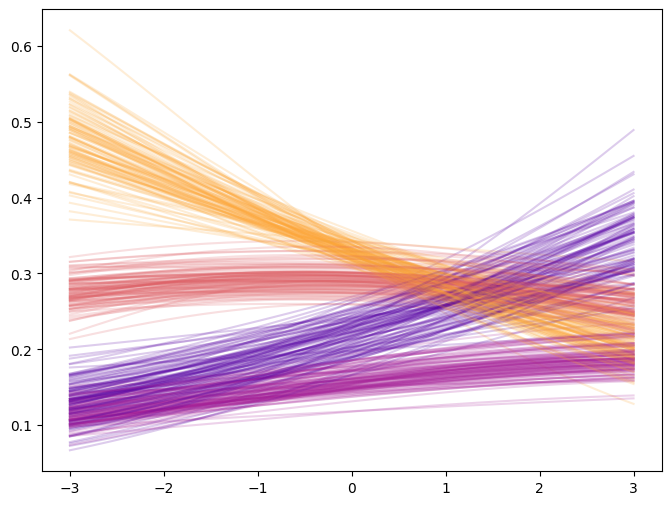

In [104]:
# Initialize chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create 100 lines for each group. We don't care about the loop value, so we use the underscore.
for _ in range(100):
    # The 0 means we create values for the first panel
    probs = probabilities.compute(0)
    # Now loop over the arrays in 'y', using a different color for each group.
    for prob, color in zip(probs, COLORS):
        ax.plot(x, prob, color=color, alpha=0.2, lw=1.5)